In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [4]:
cd drive/My\ Drive/DSF/Project/

/content/drive/My Drive/DSF/Project


In [5]:
ls

 costello_ace_2015-2016.csv   File.txt
 costello_ace_2017-2018.csv  "Retail Data Analysis - Data CSE519 Fall'19"/


In [0]:
df = pd.read_csv("costello_ace_2015-2016.csv", usecols=['Receipt Number','Item Description'])

In [0]:
df1 = pd.read_csv("costello_ace_2017-2018.csv", usecols=['Receipt Number','Item Description'])

In [0]:
df = df.append(df1)

In [9]:
df.head()

,Receipt Number,Item Description
0,4297,REG SEL INT MATTE BS1 GL
1,4297,REG SEL INT MATTE BS2 GL
2,A03697,BLADE CUTOFF 4.5X1/16MTL
3,A03697,CUT WHL4-1/2X.045 MTL
4,A03697,GLOVE LTHR PALM WRK 3PK


In [10]:
print(df.shape)

(32955543, 2)


In [11]:
df['Item Description']

0           REG SEL INT MATTE BS1 GL
1           REG SEL INT MATTE BS2 GL
2           BLADE CUTOFF 4.5X1/16MTL
3              CUT WHL4-1/2X.045 MTL
4            GLOVE LTHR PALM WRK 3PK
                      ...           
17328039       PALMYRA PUSHBROOM 18"
17328040      WIRE BRUSH MINI SS 3PK
17328041         BRUSH SCRUB HANG-UP
17328042         CM SLIDE LOCK KNIFE
17328043                         NaN
Name: Item Description, Length: 32955543, dtype: object

In [0]:
df_copy = df.copy()

In [0]:
# removing unnecessary items
df_copy = df_copy.drop(df_copy[df_copy['Item Description']=='CMN Donations'].index)
df_copy = df_copy.drop(df_copy[df_copy['Item Description']=='FASTENERS'].index)
df_copy = df_copy.drop(df_copy[df_copy['Item Description']=='FASTENERS/SCREWS/NAILS/BOLTS ETC'].index)
df_copy = df_copy[~df_copy['Item Description'].str.contains('INST SAVINGS', na=False)]
df_copy = df_copy[~df_copy['Item Description'].str.contains('COUPON SAVE', na=False)]

In [14]:
df_copy['Item Description'].value_counts()

BIRDSEED WILDBIRD 20#ACE        141856
KEY KWIKSET KW1-ACE250PK        111535
KEY SCHLAGE SC1-ACE250PK         95032
CONTRACTOR BAGS 3MIL. 20CNT      78390
TRAP SPIDER & CRICKET PK         62843
                                 ...  
FEBOFFER1$5OFF$25                    1
16" CARDINALS HOT AIR BALLON         1
SY-ANY1-PET                          1
SPRYPNT STAINGLS ONE 6OZ             1
TRIM GIFT GOLD SNOWFLAKE             1
Name: Item Description, Length: 132809, dtype: int64

In [16]:
df_copy['Item Description'].value_counts()

BIRDSEED WILDBIRD 20#ACE       141856
KEY KWIKSET KW1-ACE250PK       111535
KEY SCHLAGE SC1-ACE250PK        95032
CONTRACTOR BAGS 3MIL. 20CNT     78390
TRAP SPIDER & CRICKET PK        62843
                                ...  
POT TREE 4.5'HYDE PK WHT            1
LARGE ROASTER COOKWARE              1
SCREEN FIBER 48X100 GRAY            1
TINLEY 2H KIT FAUCET BN             1
TRIM GIFT GOLD SNOWFLAKE            1
Name: Item Description, Length: 130899, dtype: int64

In [0]:
# creating basket of items.
n = 100
df1 = df_copy[df_copy['Item Description'].isin(df_copy['Item Description'].value_counts()[:n].index.tolist())]

basket_full = df1.groupby(['Receipt Number','Item Description']).size().reset_index(name='count')
basket_full = (basket_full.groupby(['Receipt Number','Item Description'])['count'].sum().unstack().reset_index().fillna(0).set_index('Receipt Number'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets_full = basket_full.applymap(encode_units)

Removing baskets with single item:

In [0]:
basket_sets_full['sum'] = basket_sets_full.sum(axis=1)

In [0]:
basket_sets_full = basket_sets_full[basket_sets_full['sum']>1]

In [36]:
basket_sets_full["sum"].value_counts()

2     269303
3     187718
4     104406
5      48579
6      20273
7       7604
8       2550
9        932
10       288
11        69
12        17
14         2
13         2
Name: sum, dtype: int64

In [0]:
basket_sets_full.drop(columns=['sum'], inplace=True)

In [38]:
basket_sets_full.shape

(641743, 100)

In [0]:
# del df, df1

In [42]:
# getting association rules using apriori algorithm
frequent_itemsets_full = apriori(basket_sets_full, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets_full, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ORANGE BURST SUET),(BERRY BLAST SUET),0.019302,0.022146,0.010707,0.554694,25.047233,0.010279,2.195917
0,(BERRY BLAST SUET),(BIRD BLEND SUET),0.022146,0.025400,0.011064,0.499578,19.668747,0.010501,1.947556
3,(BERRY BLAST SUET),(ORANGE BURST SUET),0.022146,0.019302,0.010707,0.483465,25.047233,0.010279,1.898608
1,(BIRD BLEND SUET),(BERRY BLAST SUET),0.025400,0.022146,0.011064,0.435583,19.668747,0.010501,1.732502
14,(KEY SCHLAGE SC1-ACE250PK),(KEY KWIKSET KW1-ACE250PK),0.118133,0.136954,0.028977,0.245294,1.791076,0.012799,1.143553
15,(KEY KWIKSET KW1-ACE250PK),(KEY SCHLAGE SC1-ACE250PK),0.136954,0.118133,0.028977,0.211585,1.791076,0.012799,1.118532
9,(PEAK WASH/DEICER -25),(BIRDSEED WILDBIRD 20#ACE),0.075256,0.162176,0.011061,0.146972,0.906251,-0.001144,0.982177
11,(TRAP SPIDER & CRICKET PK),(BIRDSEED WILDBIRD 20#ACE),0.079064,0.162176,0.011336,0.143381,0.884109,-0.001486,0.978059
4,(CONTRACTOR BAGS 3MIL. 20CNT),(BIRDSEED WILDBIRD 20#ACE),0.099622,0.162176,0.013805,0.138569,0.854439,-0.002352,0.972596
7,(KEY KWIKSET KW1-ACE250PK),(BIRDSEED WILDBIRD 20#ACE),0.136954,0.162176,0.017770,0.129755,0.800087,-0.004440,0.962745


In [52]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Visualizing the association rules:

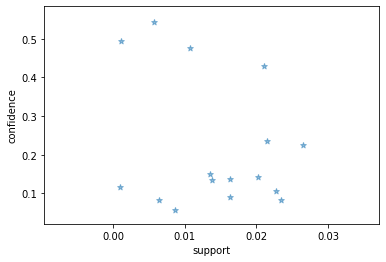

In [53]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [0]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('black')
       else:
            color_map.append('red')
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)

  plt.show()

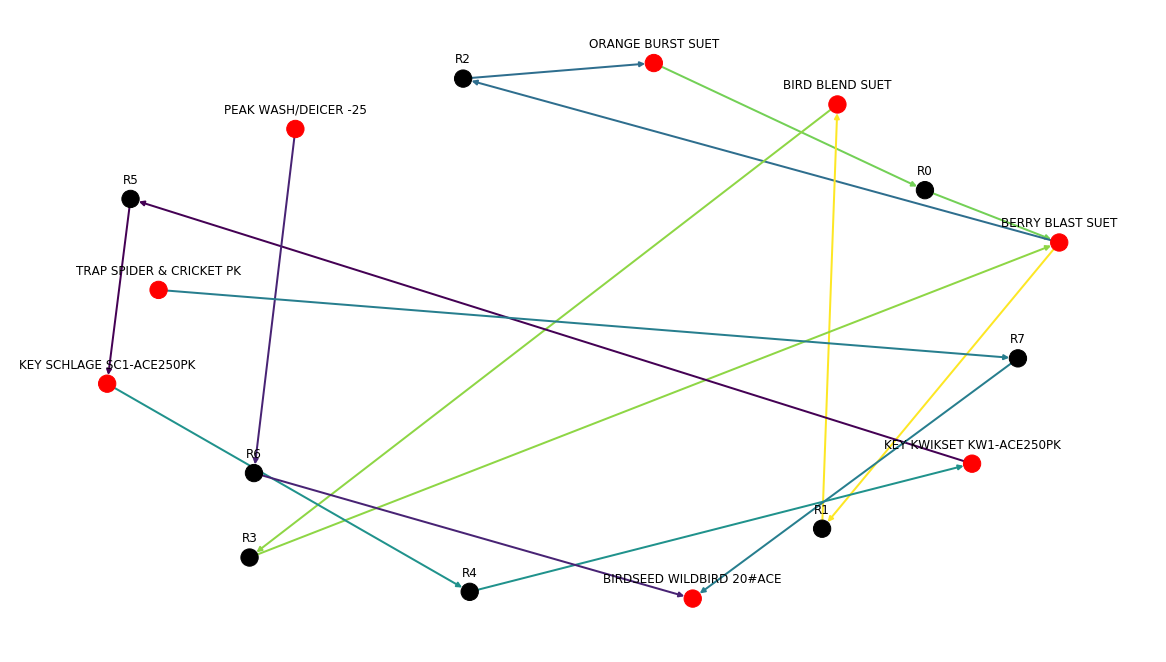

In [93]:
draw_graph(rules,8)